In [ ]:
from pathlib import Path

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

mpl.rcParams["font.family"] = "Arial"
plt.rcParams.update({"font.size": 14})
mpl.rcParams["pdf.fonttype"] = 42

In [ ]:
import json


def extract_ratings_to_dataframe(data: dict) -> pd.DataFrame:
    """Extract ratings data from nested dictionary structure and convert to DataFrame.

    Parameters
    ----------
    data : dict
        Nested dictionary containing the experimental results

    Returns
    -------
    pd.DataFrame
        DataFrame with entry names and ratings

    """
    rows = []

    for entry_name, entry_data in data.items():
        for config_name, config_data in entry_data.items():
            if "outputs" in config_data and "ratings_dict" in config_data["outputs"]:
                ratings = config_data["outputs"]["ratings_dict"]

                row = {
                    "entry": entry_name,
                    "configuration": config_name,
                    "Completeness": ratings.get("Completeness", None),
                    "Technical Accuracy": ratings.get("Technical Accuracy", None),
                    "Logical Flow": ratings.get("Logical Flow", None),
                    "Safety": ratings.get("Safety", None),
                    "Formatting": ratings.get("Formatting", None),
                    "Overall": ratings.get("Overall", None),
                    "Processing_Time": config_data["outputs"]["processing_time"],
                }

                rows.append(row)

    df = pd.DataFrame(rows)

    numerical_cols = [
        "Completeness",
        "Technical Accuracy",
        "Logical Flow",
        "Safety",
        "Formatting",
        "Overall",
        "Processing_Time",
    ]
    for col in numerical_cols:
        if col in df.columns:
            df[col] = df[col].round(3)

    return df

In [ ]:
with Path.open(
    "/Users/patriciaskowronek/Documents/documentation_agent_few_shot_examples/results_protocol_generation/final_protocol_results_gemini-2.5-pro-preview-03-25.json",
) as f:
    data = json.load(f)
df_all = extract_ratings_to_dataframe(data)

with Path.open(
    "/Users/patriciaskowronek/Documents/documentation_agent_few_shot_examples/results_protocol_generation/final_protocol_results_gemini-2.5-pro-preview-03-25_withoutPersona.json",
) as f:
    data = json.load(f)
df_witho_p = extract_ratings_to_dataframe(data)

with Path.open(
    "/Users/patriciaskowronek/Documents/documentation_agent_few_shot_examples/results_protocol_generation/final_protocol_results_gemini-2.0-flash-001.json",
) as f:
    data = json.load(f)
df_gemini2flash = extract_ratings_to_dataframe(data)
df_gemini2flash["configuration"] = "gemini-2.0-flash_AND_without_added_knowledge"

with Path.open(
    "/Users/patriciaskowronek/Documents/documentation_agent_few_shot_examples/results_protocol_generation/final_protocol_results_reanalysis1.json",
) as f:
    data = json.load(f)
df_reanalysis1 = extract_ratings_to_dataframe(data)

with Path.open(
    "/Users/patriciaskowronek/Documents/documentation_agent_few_shot_examples/results_protocol_generation/final_protocol_results_reanalysis2.json",
) as f:
    data = json.load(f)
df_reanalysis2 = extract_ratings_to_dataframe(data)


df_united = pd.concat(
    [df_all, df_witho_p, df_gemini2flash, df_reanalysis1, df_reanalysis2],
    ignore_index=True,
)
print(set(df_united["configuration"]))

custom_order = [
    "gemini-2.0-flash_AND_without_added_knowledge",
    "without_added_knowledge",
    "with_examples",
    "with_thinking_step_by_step",
    "with_thinking_step_by_step_plus_unspecific_knowledge",
    "with_thinking_step_by_step_plus_specific_knowledge",
    "with_thinking_step_by_step_plus_specific_knowledge_without_persona",
]

# Convert to categorical with custom order
df_united["configuration"] = pd.Categorical(
    df_united["configuration"], categories=custom_order, ordered=True
)
df_custom_sorted = df_united.sort_values("configuration")

filter_list = [
    "gemini-2.0-flash_AND_without_added_knowledge",
    "without_added_knowledge",
    "with_examples",
    "with_thinking_step_by_step",
    "with_thinking_step_by_step_plus_unspecific_knowledge",
    "with_thinking_step_by_step_plus_specific_knowledge",
]
df_custom_filtered = df_custom_sorted[
    df_custom_sorted["configuration"].isin(filter_list)
]
df_custom_filtered

{'with_thinking_step_by_step_plus_specific_knowledge', 'with_thinking_step_by_step_plus_unspecific_knowledge', 'with_examples', 'without_added_knowledge', 'with_thinking_step_by_step_plus_specific_knowledge_without_persona', 'gemini-2.0-flash_AND_without_added_knowledge', 'with_thinking_step_by_step'}


,entry,configuration,Completeness,Technical Accuracy,Logical Flow,Safety,Formatting,Overall,Processing_Time
53,PlaceEvotips_protocolCorrect,gemini-2.0-flash_AND_without_added_knowledge,2.500,2.857,3.143,3.071,2.429,2.800,188.942
54,ConnectingColumnSampleLine_protocolCorrect,gemini-2.0-flash_AND_without_added_knowledge,2.300,2.950,3.050,2.100,1.950,2.470,329.963
55,ESIsourceToUltraSource_protocolCorrect_Capilla...,gemini-2.0-flash_AND_without_added_knowledge,2.714,3.214,3.429,2.571,2.714,2.929,385.043
56,UltraSourceToESIsource_protocolCorrect,gemini-2.0-flash_AND_without_added_knowledge,3.200,3.600,3.867,3.467,2.467,3.320,381.658
62,Evotip_protocolCorrect,gemini-2.0-flash_AND_without_added_knowledge,2.875,3.750,3.250,1.500,2.000,2.675,114.518
57,DisconnectColumn_protocolCorrect,gemini-2.0-flash_AND_without_added_knowledge,2.769,2.692,3.769,2.462,2.538,2.846,369.997
58,TimsCalibration_protocolCorrect,gemini-2.0-flash_AND_without_added_knowledge,3.455,4.227,3.773,4.273,2.636,3.673,401.632
59,QueueSamples_protocolCorrect,gemini-2.0-flash_AND_without_added_knowledge,2.000,5.000,4.917,5.000,3.000,3.983,400.914
61,Diluting_protocolCorrect,gemini-2.0-flash_AND_without_added_knowledge,3.083,4.333,4.750,2.583,2.833,3.517,287.843
60,Pipette_protocolCorrect,gemini-2.0-flash_AND_without_added_knowledge,3.286,4.071,4.143,2.500,3.000,3.400,279.879


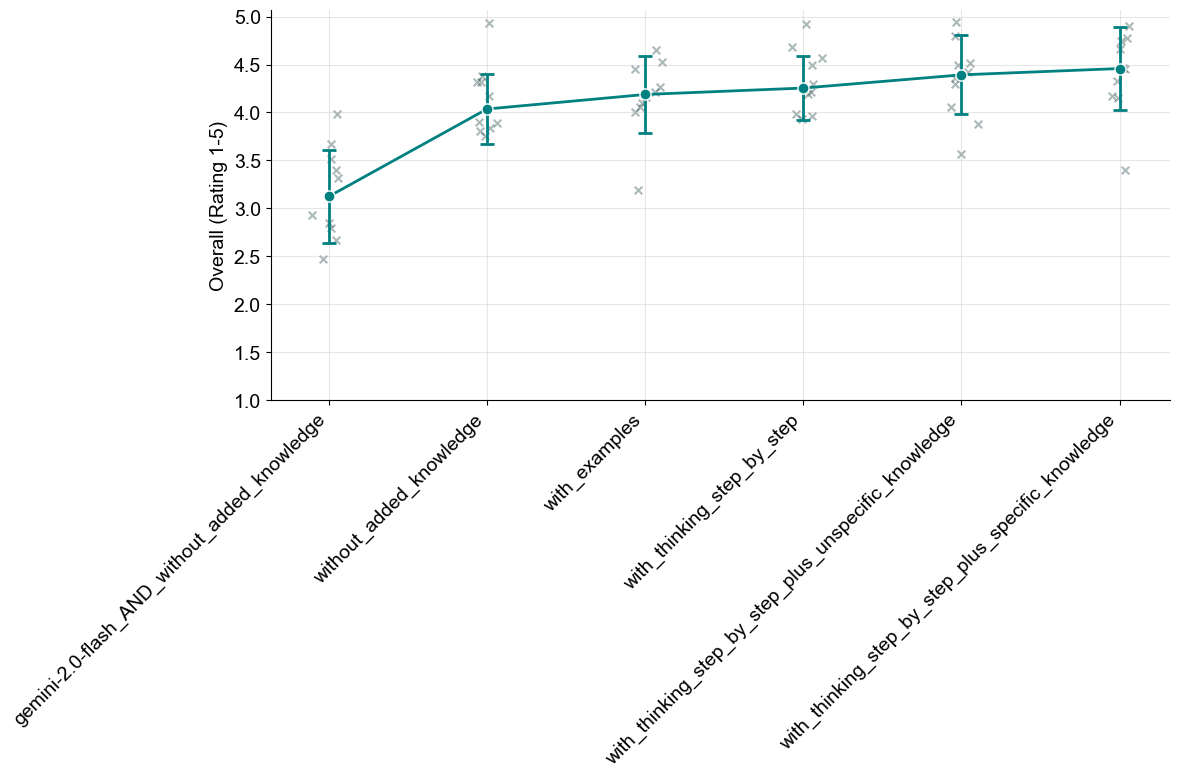


Summary Statistics by Configuration: 'Technical Accuracy'


/var/folders/54/g1_1ycl12hl02xj_g_nm_6cm0000gn/T/ipykernel_81376/204249675.py:39: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('configuration')['Technical Accuracy'].describe()


,count,mean,std,min,25%,50%,75%,max
configuration,,,,,,,,
gemini-2.0-flash_AND_without_added_knowledge,10.0,3.6694,0.747931,2.692,3.01600,3.6750,4.18800,5.000
without_added_knowledge,10.0,4.4574,0.478243,3.600,4.19450,4.4835,4.89175,5.000
with_examples,10.0,4.2727,0.814481,2.273,3.99850,4.5390,4.81100,4.947
with_thinking_step_by_step,10.0,4.3165,0.774490,2.538,4.02500,4.6250,4.87825,5.000
with_thinking_step_by_step_plus_unspecific_knowledge,10.0,4.5959,0.473184,3.571,4.37600,4.8060,4.91725,5.000
with_thinking_step_by_step_plus_specific_knowledge,10.0,4.5688,0.687126,2.833,4.52325,4.8815,4.98325,5.000
with_thinking_step_by_step_plus_specific_knowledge_without_persona,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import matplotlib.pyplot as plt


def plot_line_with_error_bars(
    df: pd.DataFrame, column_value: str, ax: plt.Axes
) -> None:
    """Plot line with error bars showing medians and standard deviations by configuration.

    Args:
        df: DataFrame containing the data to plot
        column_value: Name of the column to plot values for
        ax: Matplotlib axes object to plot on

    """
    configs = df["configuration"].unique()
    medians = [
        df[df["configuration"] == config][column_value].median() for config in configs
    ]
    stds = [df[df["configuration"] == config][column_value].std() for config in configs]

    # Line plot with error bars
    ax.errorbar(
        range(len(configs)),
        medians,
        yerr=stds,
        marker="o",
        markersize=8,
        linewidth=2,
        capsize=5,
        color="teal",
        markerfacecolor="teal",
        markeredgecolor="white",
        ecolor="teal",
        capthick=2,
    )

    for i, config in enumerate(configs):
        y_values = df[df["configuration"] == config][column_value].to_numpy()
        rng = np.random.default_rng()
        x_jitter = rng.normal(i, 0.05, size=len(y_values))
        ax.scatter(
            x_jitter, y_values, alpha=0.4, s=30, marker="x", color="darkslategray"
        )

    ax.set_xticks(range(len(configs)))
    ax.set_xticklabels(configs, rotation=45, ha="right")
    ax.set_ylabel(column_value + " (Rating 1-5)")
    ax.grid(visible=True, alpha=0.3)
    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.set_ylim(
        1,
    )

    plt.tight_layout()
    plt.show()


df = df_custom_filtered.copy()
fig, ax = plt.subplots(figsize=(12, 8))
# for column_value in ['Completeness', 'Technical Accuracy', 'Logical Flow', 'Safety', 'Formatting', 'Overall']:
for column_value in ["Overall"]:
    plot_line_with_error_bars(df, column_value, ax)

print("\nSummary Statistics by Configuration: 'Technical Accuracy'")
df.groupby("configuration")["Technical Accuracy"].describe()

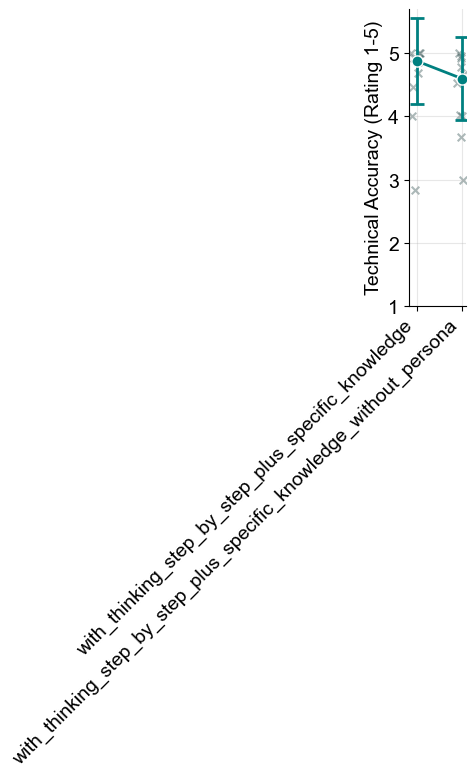


Summary Statistics by Configuration: 'Technical Accuracy'


/var/folders/54/g1_1ycl12hl02xj_g_nm_6cm0000gn/T/ipykernel_81376/3672956692.py:13: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('configuration')['Technical Accuracy'].describe()


,count,mean,std,min,25%,50%,75%,max
configuration,,,,,,,,
gemini-2.0-flash_AND_without_added_knowledge,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
without_added_knowledge,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
with_examples,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
with_thinking_step_by_step,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
with_thinking_step_by_step_plus_unspecific_knowledge,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
with_thinking_step_by_step_plus_specific_knowledge,10.0,4.5688,0.687126,2.833,4.52325,4.8815,4.98325,5.0
with_thinking_step_by_step_plus_specific_knowledge_without_persona,10.0,4.3567,0.663716,3.000,4.00650,4.6025,4.89100,5.0


In [98]:
filter_list = [
    "with_thinking_step_by_step_plus_specific_knowledge",
    "with_thinking_step_by_step_plus_specific_knowledge_without_persona",
]
df_custom_filtered2 = df_custom_sorted[
    df_custom_sorted["configuration"].isin(filter_list)
]

df = df_custom_filtered2.copy()
fig, ax = plt.subplots(figsize=(4, 8))
for column_value in ["Technical Accuracy"]:
    plot_line_with_error_bars(df, column_value, ax)

print("\nSummary Statistics by Configuration: 'Technical Accuracy'")
df.groupby("configuration")["Technical Accuracy"].describe()

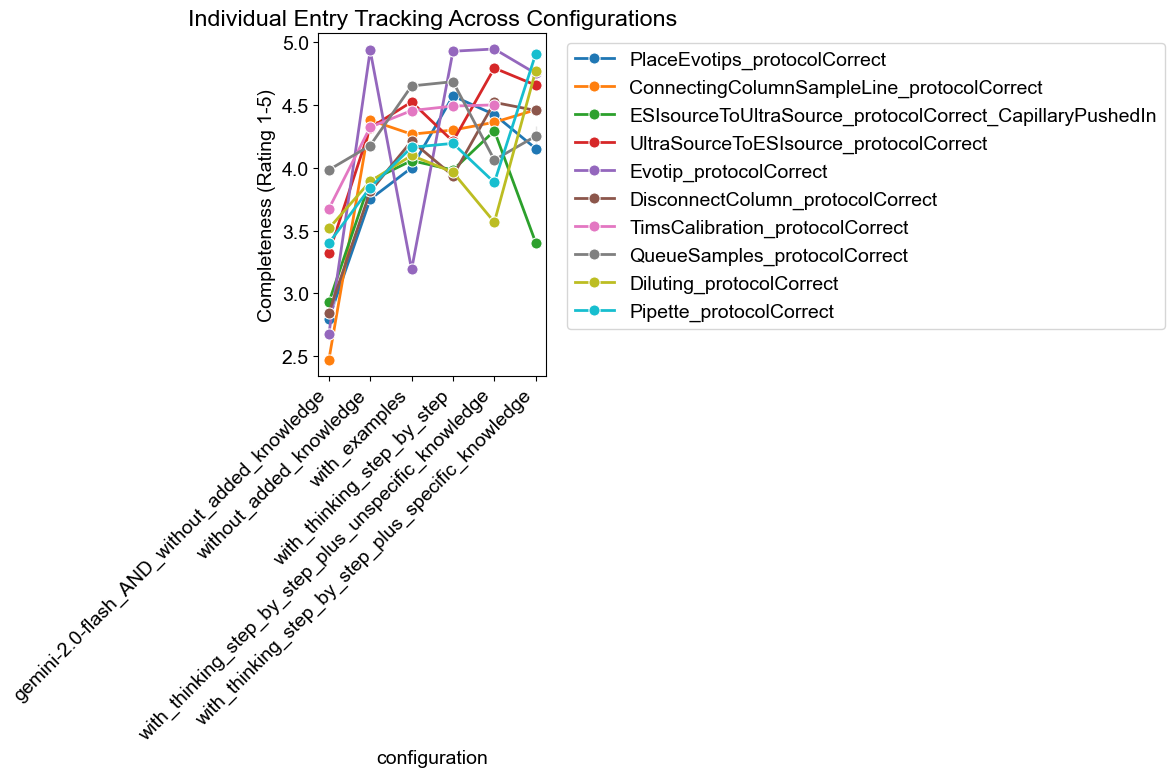

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))
sns.lineplot(
    data=df_custom_filtered,
    x="configuration",
    y="Overall",
    hue="entry",
    marker="o",
    linewidth=2,
    markersize=8,
)

plt.xticks(rotation=45, ha="right")
plt.ylabel("Completeness (Rating 1-5)")
plt.title("Individual Entry Tracking Across Configurations")
plt.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

In [ ]:
with Path.open(
    "/Users/patriciaskowronek/Documents/documentation_agent_few_shot_examples/results_protocol_generation/final_protocol_results_gemini-2.5-pro-preview-03-25.json",
) as f:
    data = json.load(f)
df_all = extract_ratings_to_dataframe(data)

with Path.open(
    "/Users/patriciaskowronek/Documents/documentation_agent_few_shot_examples/results_protocol_generation/final_protocol_results_reanalysis1.json",
) as f:
    data = json.load(f)
df_reanalysis1 = extract_ratings_to_dataframe(data)

with Path.open(
    "/Users/patriciaskowronek/Documents/documentation_agent_few_shot_examples/results_protocol_generation/final_protocol_long_step_describtion_vs_brief.json",
) as f:
    data = json.load(f)
df_run1 = extract_ratings_to_dataframe(data)
set(df_run1["configuration"])
df_run1["configuration"][
    df_run1["configuration"] == "with_thinking_step_by_step_plus_specific_knowledge"
] = "not_needed"
df_run1["configuration"][
    df_run1["configuration"]
    == "with_thinking_step_by_step_plus_specific_knowledge_brief"
] = "with_thinking_step_by_step_plus_specific_knowledge"

df_united = pd.concat([df_all, df_reanalysis1, df_run1], ignore_index=True)

df_reduced = df_united[
    df_united["configuration"] == "with_thinking_step_by_step_plus_specific_knowledge"
].reset_index()
df_reduced.sort_values(by="entry")

/var/folders/54/g1_1ycl12hl02xj_g_nm_6cm0000gn/T/ipykernel_81376/4242699524.py:13: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_run1["configuration"][df_run1["configuration"]=="with_thinking_step_by_step_plus_specific_knowledge"] = "not_

,index,entry,configuration,Completeness,Technical Accuracy,Logical Flow,Safety,Formatting,Overall,Processing_Time
1,9,ConnectingColumnSampleLine_protocolCorrect,with_thinking_step_by_step_plus_specific_knowl...,3.864,4.000,5.000,4.667,4.773,4.461,293.076
10,52,ConnectingColumnSampleLine_protocolCorrect,with_thinking_step_by_step_plus_specific_knowl...,4.100,4.400,5.000,NaN,5.000,NaN,699.404
7,40,Diluting_protocolCorrect,with_thinking_step_by_step_plus_specific_knowl...,4.750,5.000,5.000,4.167,4.950,4.773,239.955
16,65,Diluting_protocolCorrect,with_thinking_step_by_step_plus_specific_knowl...,4.864,5.000,5.000,4.500,4.864,4.845,398.448
12,57,DisconnectColumn_protocolCorrect,with_thinking_step_by_step_plus_specific_knowl...,4.286,4.357,4.889,4.333,4.000,4.373,328.782
4,22,DisconnectColumn_protocolCorrect,with_thinking_step_by_step_plus_specific_knowl...,3.857,4.692,5.000,4.500,4.231,4.456,293.451
2,14,ESIsourceToUltraSource_protocolCorrect_Capilla...,with_thinking_step_by_step_plus_specific_knowl...,2.917,2.833,4.125,2.600,4.545,3.404,556.472
11,54,ESIsourceToUltraSource_protocolCorrect_Capilla...,with_thinking_step_by_step_plus_specific_knowl...,4.154,4.846,4.833,4.250,3.385,4.294,491.150
8,44,Evotip_protocolCorrect,with_thinking_step_by_step_plus_specific_knowl...,4.462,5.000,5.000,4.750,4.538,4.750,296.138
17,67,Evotip_protocolCorrect,with_thinking_step_by_step_plus_specific_knowl...,4.154,5.000,5.000,4.600,4.923,4.735,214.844


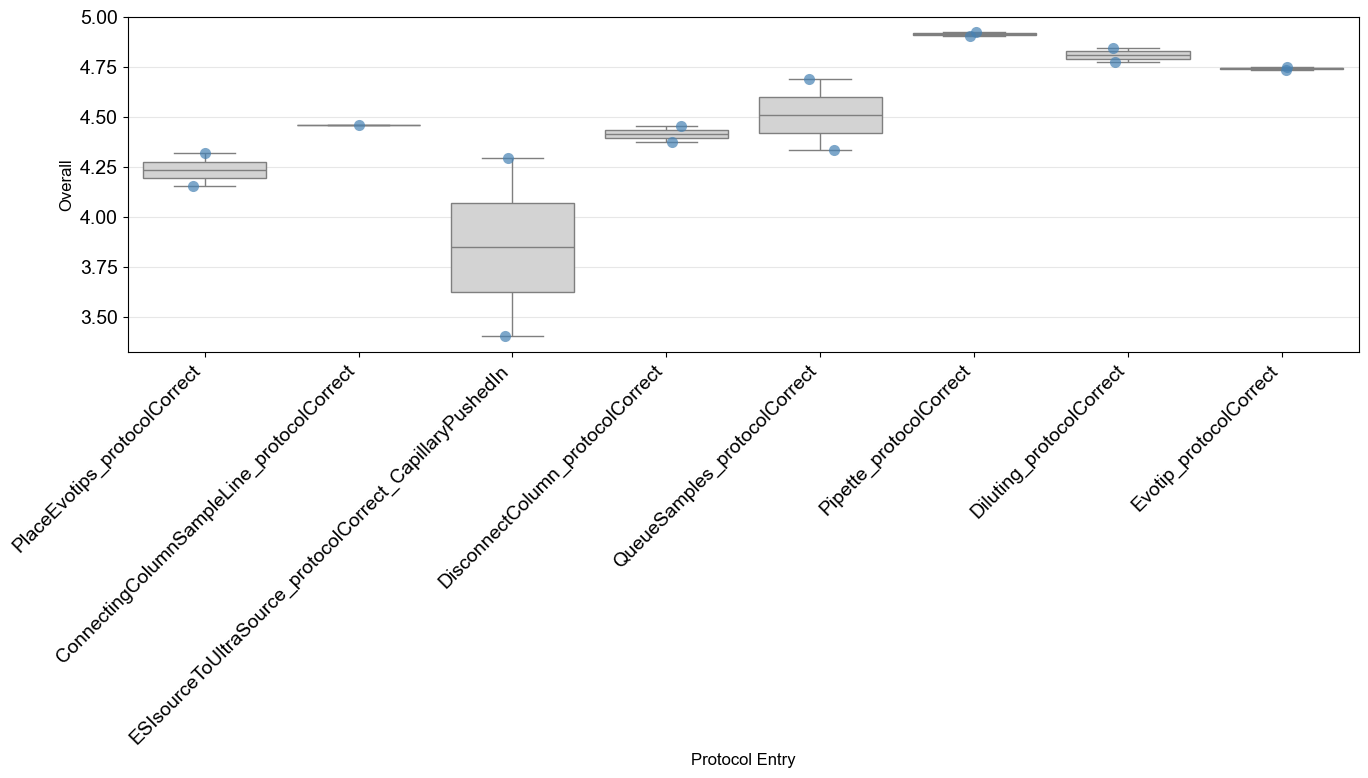

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


def compare_entries_boxplot(df: pd.DataFrame, metric: str) -> None:
    """Create box plots comparing all entries."""
    # Filter to only entries that have multiple measurements
    entry_counts = df["entry"].value_counts()
    entries_with_pairs = entry_counts[entry_counts > 1].index
    df_paired = df[df["entry"].isin(entries_with_pairs)]

    if df_paired.empty:
        print("No entries with multiple measurements found!")
        return

    plt.figure(figsize=(14, 8))

    # Create box plot
    sns.boxplot(data=df_paired, x="entry", y=metric, color="lightgray")
    sns.stripplot(
        data=df_paired, x="entry", y=metric, color="steelblue", size=8, alpha=0.7
    )

    plt.xlabel("Protocol Entry", fontsize=12)
    plt.ylabel(metric, fontsize=12)
    plt.xticks(rotation=45, ha="right")
    plt.grid(visible=True, alpha=0.3, axis="y")
    plt.tight_layout()
    plt.show()


compare_entries_boxplot(df_reduced, "Overall")

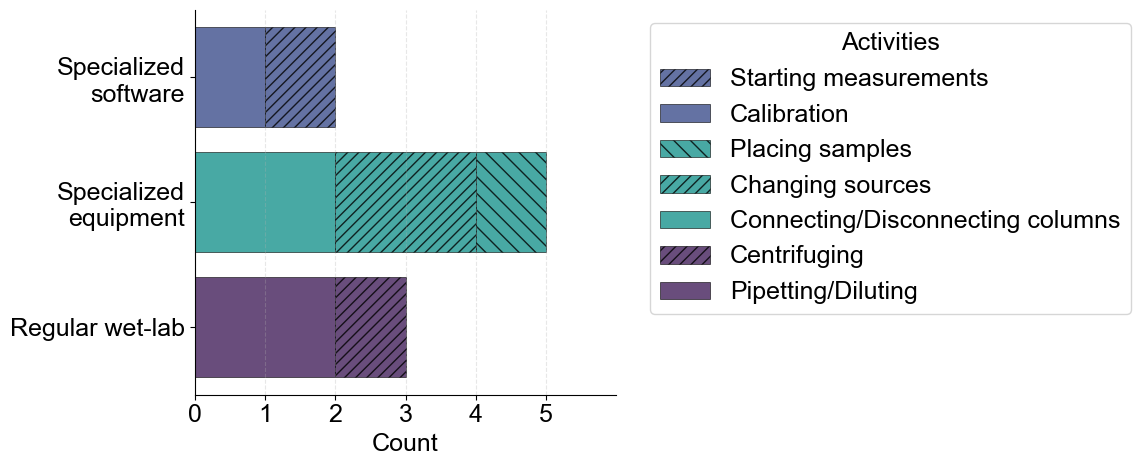

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams["font.family"] = "Arial"
plt.rcParams.update({"font.size": 18})
mpl.rcParams["pdf.fonttype"] = 42

# Data
category1 = "Regular wet-lab"
category2 = "Specialized\nequipment"
category3 = "Specialized\nsoftware"
categories = [category1, category2, category3]

# Data for each category
data = {
    category1: {"Pipetting/Diluting": 2, "Centrifuging": 1},
    category2: {
        "Connecting/Disconnecting columns": 2,
        "Changing sources": 2,
        "Placing samples": 1,
    },
    category3: {"Calibration": 1, "Starting measurements": 1},
}

# Create figure and axis
fig, ax = plt.subplots(figsize=(12, 5))

# Define colors for each category
category_colors = {
    category1: "#43215B",  # Red
    category2: "#1A948E",  # Blue
    category3: "#3D4F8C",  # Green
}

# Define hatch patterns for each category
category_hatches = {
    category1: ["", "///"],  # Solid and diagonal
    category2: ["", "///", "\\\\"],  # Different patterns
    category3: ["", "///"],  # Plus and circles
}

# Create the stacked bars
for i, category in enumerate(categories):
    left = 0
    activities = list(data[category].keys())
    hatches = category_hatches[category]

    for j, (activity, value) in enumerate(data[category].items()):
        ax.barh(
            i,
            value,
            left=left,
            color=category_colors[category],
            hatch=hatches[j % len(hatches)],
            edgecolor="black",
            linewidth=0.5,
            label=activity,
            alpha=0.8,
        )
        left += value

# Customize the plot
ax.set_yticks(range(len(categories)))
ax.set_yticklabels(categories)
ax.set_xlabel("Count")
ax.set_xlim(0, 6)
ax.set_xticks(range(6))

# Add legend
handles, labels = ax.get_legend_handles_labels()
by_label = dict(zip(labels, handles))
reversed_items = list(reversed(list(by_label.items())))
ax.legend(
    [item[1] for item in reversed_items],
    [item[0] for item in reversed_items],
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    title="Activities",
)

# Remove top and right spines
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

# Add grid for better readability
ax.grid(axis="x", alpha=0.3, linestyle="--")

plt.tight_layout()
plt.show()